# standard, min-max, robust 비교 고찰

In [2]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
import matplotlib.pyplot as plt

import seaborn as sns
%matplotlib inline

In [3]:
# data
x = pd.DataFrame({
    # Distribution with lower outliers
    'x1': np.concatenate([np.random.normal(20, 2, 1000), np.random.normal(1, 2, 25)]),
    # Distribution with higher outliers
    'x2': np.concatenate([np.random.normal(30, 2, 1000), np.random.normal(50, 2, 25)]),
})
np.random.normal

<function RandomState.normal>

In [4]:
scaler = StandardScaler()
standard_df = scaler.fit_transform(x)
standard_df = pd.DataFrame(standard_df, columns=['x1','x2'])
standard_df

,x1,x2
0,0.149362,-0.117180
1,1.244546,0.480856
2,-0.692697,-1.183137
3,-0.188995,-0.516778
4,0.154079,0.144204
...,...,...
1020,-5.836444,5.190403
1021,-6.003953,5.399710
1022,-5.489242,5.287779
1023,-4.126271,5.096636


In [5]:
scaler = MinMaxScaler()
MinMax_df = scaler.fit_transform(x)
MinMax_df = pd.DataFrame(MinMax_df, columns=['x1','x2'])
MinMax_df

,x1,x2
0,0.788743,0.207247
1,0.925265,0.277643
2,0.683774,0.081772
3,0.746564,0.160210
4,0.789331,0.238015
...,...,...
1020,0.042570,0.832008
1021,0.021689,0.856645
1022,0.085851,0.843470
1023,0.255755,0.820970


In [6]:
scaler = RobustScaler()
Robust_df = scaler.fit_transform(x)
Robust_df = pd.DataFrame(Robust_df, columns=['x1','x2'])
Robust_df

,x1,x2
0,0.056963,-0.018842
1,1.545586,0.740882
2,-1.087603,-1.372996
3,-0.402949,-0.526478
4,0.063374,0.313210
...,...,...
1020,-8.079217,6.723723
1021,-8.306902,6.989619
1022,-7.607283,6.847427
1023,-5.754672,6.604605


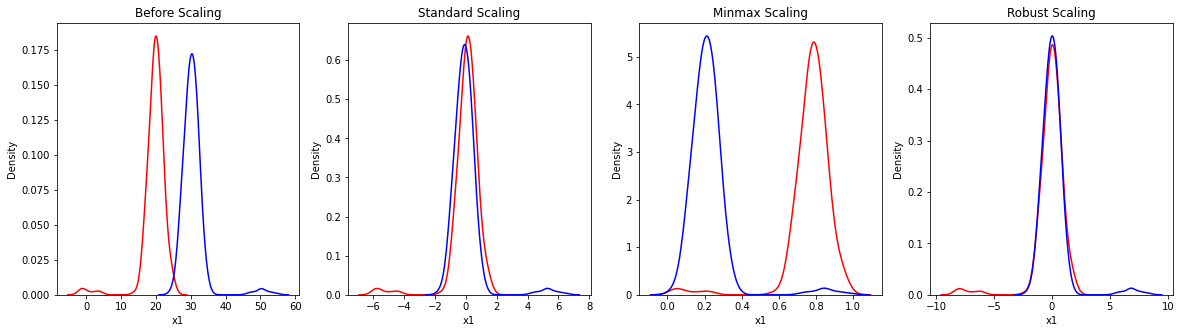

In [7]:
fig , (ax1, ax2, ax3, ax4) = plt.subplots(ncols=4, figsize=(20,5))
ax1.set_title('Before Scaling')
sns.kdeplot(x['x1'], ax=ax1, color='r') 
sns.kdeplot(x['x2'], ax=ax1, color='b')

ax2.set_title('Standard Scaling')
sns.kdeplot(standard_df['x1'], ax=ax2, color='r')
sns.kdeplot(standard_df['x2'], ax=ax2, color='b')

ax3.set_title('Minmax Scaling')
sns.kdeplot(MinMax_df['x1'], ax=ax3, color='r')
sns.kdeplot(MinMax_df['x2'], ax=ax3, color='b')

ax4.set_title('Robust Scaling')
sns.kdeplot(Robust_df['x1'], ax=ax4, color='r')
sns.kdeplot(Robust_df['x2'], ax=ax4, color='b')

plt.show()

In [8]:
from sklearn.datasets import load_iris
import pandas as pd

iris = load_iris()
iris_data = iris.data
iris_df = pd.DataFrame(data=iris_data, columns=iris.feature_names)

print('feature 들의 평균 값')
print(iris_df.mean())
print('\nfeature 들의 분산 값')
print(iris_df.var())

feature 들의 평균 값
sepal length (cm)    5.843333
sepal width (cm)     3.057333
petal length (cm)    3.758000
petal width (cm)     1.199333
dtype: float64

feature 들의 분산 값
sepal length (cm)    0.685694
sepal width (cm)     0.189979
petal length (cm)    3.116278
petal width (cm)     0.581006
dtype: float64


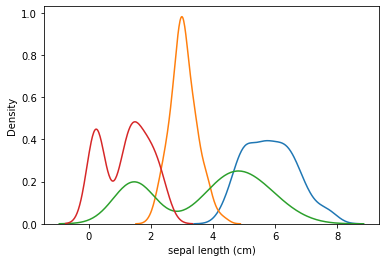

In [9]:
sns.kdeplot(iris_df['sepal length (cm)'])
sns.kdeplot(iris_df['sepal width (cm)'])
sns.kdeplot(iris_df['petal length (cm)'])
sns.kdeplot(iris_df['petal width (cm)'])
plt.show()

## StandardScaler
* 평균이 0이고 분산이 1인 정규분포 형태로 변환
* https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html?highlight=standard#sklearn.preprocessing.StandardScaler(참고 사이트)


In [10]:
from sklearn.preprocessing import StandardScaler

#StandarScaler 객체 생성
scaler = StandardScaler()
#StandardScaler 로 데이터 셋 변환 fit()과 transform() 호출

scaler.fit(iris_df)
iris_scaled = scaler.transform(iris_df)

#transform()시 scale 변환된 데이터 셋이 numpy ndarry로 반환되어 이를 DataFram으로 변환
iris_df_scaled = pd.DataFrame(data=iris_scaled, columns = iris.feature_names)

print('feature 들의 평균 값')
print(iris_df_scaled.mean())
print('\nfeature 들의 분산 값')
print(iris_df_scaled.var())
iris_df_scaled 


feature 들의 평균 값
sepal length (cm)   -1.690315e-15
sepal width (cm)    -1.842970e-15
petal length (cm)   -1.698641e-15
petal width (cm)    -1.409243e-15
dtype: float64

feature 들의 분산 값
sepal length (cm)    1.006711
sepal width (cm)     1.006711
petal length (cm)    1.006711
petal width (cm)     1.006711
dtype: float64


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,-0.900681,1.019004,-1.340227,-1.315444
1,-1.143017,-0.131979,-1.340227,-1.315444
2,-1.385353,0.328414,-1.397064,-1.315444
3,-1.506521,0.098217,-1.283389,-1.315444
4,-1.021849,1.249201,-1.340227,-1.315444
...,...,...,...,...
145,1.038005,-0.131979,0.819596,1.448832
146,0.553333,-1.282963,0.705921,0.922303
147,0.795669,-0.131979,0.819596,1.053935
148,0.432165,0.788808,0.933271,1.448832


In [11]:
sns.kdeplot(iris_df_scaled ['sepal length (cm)'])
sns.kdeplot(iris_df_scaled ['sepal width (cm)'])
sns.kdeplot(iris_df_scaled ['petal length (cm)'])
sns.kdeplot(iris_df_scaled ['petal width (cm)'])
plt.show()=

SyntaxError: cannot assign to function call (1045393349.py, line 5)

## MinMaxScaler
* 데이터값을 0과 1사이의 범위 값으로 변환합니다. 음수 값있으면 1에서 -1값으로 변환합니다.
* https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html?highlight=minmax#sklearn.preprocessing.MinMaxScaler(참고 사이트)

In [12]:
from sklearn.datasets import load_iris
from sklearn.preprocessing import MinMaxScaler
#MinMaxScaler 객체 생성
scaler = MinMaxScaler()
# MinMaxScaler 로 데이터 셋 변환 fit()과 transform()호출
scaler.fit(iris_df)
iris_scaled = scaler.transform(iris_df)
iris_df_scaled = pd.DataFrame(data= iris_scaled, columns=iris.feature_names)

print('feature 들의 최소 값')
print(iris_df_scaled.min())
print('\nfeature 들의 최대 값')
print(iris_df_scaled.max())

feature 들의 최소 값
sepal length (cm)    0.0
sepal width (cm)     0.0
petal length (cm)    0.0
petal width (cm)     0.0
dtype: float64

feature 들의 최대 값
sepal length (cm)    1.0
sepal width (cm)     1.0
petal length (cm)    1.0
petal width (cm)     1.0
dtype: float64


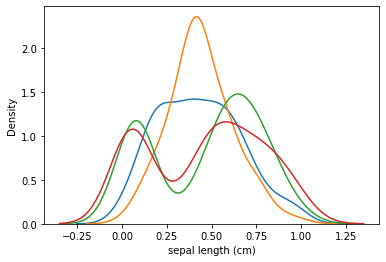

In [13]:
sns.kdeplot(iris_df_scaled['sepal length (cm)'])
sns.kdeplot(iris_df_scaled['sepal width (cm)'])
sns.kdeplot(iris_df_scaled['petal length (cm)'])
sns.kdeplot(iris_df_scaled['petal width (cm)'])
plt.show()

## RobustScaler
* 이 스케일러는 중앙값을 제거하고 분위수 범위(기본값: 사분위수 범위)에 따라 데이터의 크기를 조정합니다. IQR은 1번째 사분위수(25번째 분위수)와 3번째 사분위수(75번째 분위수) 사이의 범위입니다.
* RobustScaler(*, with_centering=True, with_scaling=True, quantile_range=(25.0, 75.0), copy= 참, unit_variance=거짓)
* https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.RobustScaler.html?highlight=robust#sklearn.preprocessing.RobustScaler (참고사이트)

In [ ]:
scaler = RobustScaler()
Robust_df = scaler.fit_transform(x)
Robust_df = pd.DataFrame(Robust_df, columns=['x1','x2'])
Robust_df

In [20]:
from sklearn.datasets import load_iris
from sklearn.preprocessing import RobustScaler
#MinMaxScaler 객체 생성
scaler = RobustScaler()
# MinMaxScaler 로 데이터 셋 변환 fit()과 transform()호출
scaler.fit(iris_df)
iris_scaled = scaler.transform(iris_df)
iris_df_scaled = pd.DataFrame(data= iris_scaled, columns=iris.feature_names)

print('feature 들의 최소 값')
print(iris_df_scaled.min())
print('\nfeature 들의 최대 값')
print(iris_df_scaled.max())

feature 들의 최소 값
sepal length (cm)   -1.153846
sepal width (cm)    -2.000000
petal length (cm)   -0.957143
petal width (cm)    -0.800000
dtype: float64

feature 들의 최대 값
sepal length (cm)    1.615385
sepal width (cm)     2.800000
petal length (cm)    0.728571
petal width (cm)     0.800000
dtype: float64


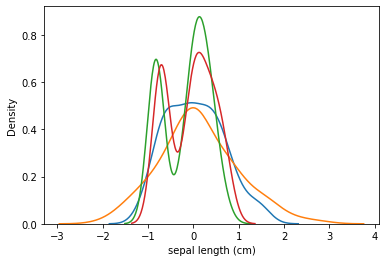

In [22]:
sns.kdeplot(iris_df_scaled ['sepal length (cm)'])
sns.kdeplot(iris_df_scaled ['sepal width (cm)'])
sns.kdeplot(iris_df_scaled ['petal length (cm)'])
sns.kdeplot(iris_df_scaled ['petal width (cm)'])
plt.show()